In [1]:
import cv2
import urllib.request
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
# from PyImageSearch
def url_to_image(url):
	# download the image, convert it to a NumPy array, and then read
	# it into OpenCV format
	resp = urllib.request.urlopen(url)
	image = np.asarray(bytearray(resp.read()), dtype="uint8")
	image = cv2.imdecode(image, cv2.IMREAD_COLOR)
 
	# return the image
	return image

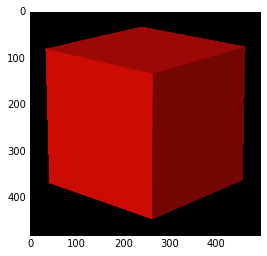

In [3]:
# get image from wikimedia commons: https://commons.wikimedia.org/wiki/File:Uniform_polyhedron-43-t0.svg
cube = url_to_image("https://upload.wikimedia.org/wikipedia/commons/thumb/6/69/Uniform_polyhedron-43-t0.svg/495px-Uniform_polyhedron-43-t0.svg.png")
plt.imshow(cube[:,:,[2,1,0]]) # reverse the layers to RGB
# this is a 3 channel image with float32 datatype, so we can simply pick the red layer 
cube = cube[:,:,2]


In [4]:
_, contours, hier = cv2.findContours(cube.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
print("outer contours found: %d" % len(contours))
dst = np.zeros_like(cube)
cv2.drawContours(dst, contours, 0, 255, 3)
contour = contours[0]

outer contours found: 1


In [5]:
# this step is optional, it just makes it easier to inspect the contour manually
peri = 0.01 * cv2.arcLength(contour, True)  # approximate such that points are never > 0.01*perimeter away
contour = cv2.approxPolyDP(contour, peri, True)
print ("points in 0th contour: %d" % len(contour))


points in 0th contour: 6


Original image with contour (light line) and contour grown by 1.1 (dark line)


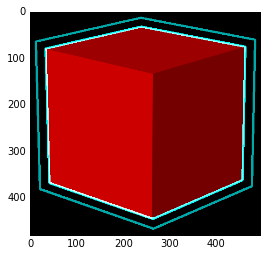

In [6]:
# find center of gravity from the moments:

moments = cv2.moments(contour)
midX = int(round(moments["m10"] / moments["m00"]))
midY = int(round(moments["m01"] / moments["m00"]))
mid = np.array([midX,midY])
dst = np.zeros_like(cube)
cv2.drawContours(dst, [contour], 0, 255, 3)
contour2 = contour - mid
contour2 = (contour2 * 1.1).astype(np.int32)
contour2 += mid
cv2.drawContours(dst, [contour2], 0, 169, 3)
plt.imshow(np.dstack([cube,dst,dst]))
print ("Original image with contour (light line) and contour grown by 1.1 (dark line)")